In this mission, I'll continue to practice exploratory data visualization — main points are about seasonality, scatter plots, and correlation.

I'll use time series data about bike sharing (*recall that a time series is a series of data points listed in time order*).

Bike sharing companies allow people to rent bikes for short trips. Someone can rent a bike from a station near their location, take a ride, and then return the bike to any other station

In [1]:
import pandas as pd
import numpy as np

bike_sharing= pd.read_csv("day.csv")
bike_sharing.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [2]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Each row describes the number of bike rentals for a single day and the corresponding weather. The data spans a period of two years (January 1, 2011 – December 31, 2012). Here are some of the columns we'll be focusing on:

- `dteday`: date in year-month-day format.
- `temp`: normalized temperature in Celsius (1 is the maximum value, and it's equivalent to 41 Celsius degrees).
- `atemp`: normalized feeling temperature in Celsius (1 is the maximum value, and it's equivalent to 50 Celsius degrees).
- `hum`: normalized humidity.
- `windspeed`: normalized wind speed.
- `casual`: the number of casual (non-registered) people who rented a bike that day.
- `registered`: the number of registered people who rented a bike that day (registered people bought a membership).
- `cnt`: the total number of people who rented a bike (casual plus registered).

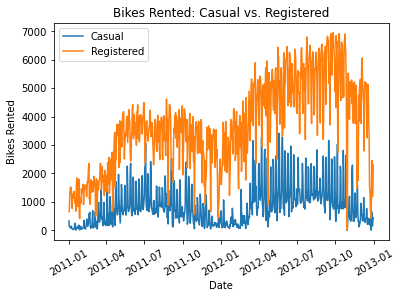

In [3]:
import matplotlib.pyplot as plt

bike_sharing = pd.read_csv('day.csv')
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])

plt.plot(bike_sharing['dteday'], bike_sharing["casual"], label= "Casual")
plt.plot(bike_sharing['dteday'], bike_sharing["registered"], label= "Registered")

#plt.xticks has the rotation parameter which we can use to control the angle or rotation
plt.xticks(rotation= 30)
plt.xlabel("Date")
plt.ylabel("Bikes Rented")
plt.title("Bikes Rented: Casual vs. Registered")
plt.legend()
plt.show()

Looking at the entire two-year period, we see the number of rented bikes is at its lowest during the winter months and at its highest during the summer (Capital Bikeshare operates only in the northern hemisphere, so the summer months are June-August, and the winter months are December-February).

In fact, we see quite a few similar patterns for both 2011 and 2012 with respect to the number of rented bikes:

- The number keeps increasing in the January-May interval.
- We see a plateau in the May-September interval, where the number of rentals stays high but constant (it neither increases nor decreases very much).
- The number keeps decreasing in the September-December interval.

We call all of these similarities **seasonal trends**. In time series data, we sometimes see specific patterns occurring regularly at specific intervals of time — we call this **seasonality**.

Weather, holidays, school vacations and other factors can often cause seasonality. One popular example is ice-cream sales seasonality, which we can attribute to variations in air temperature: sales are high during summer and low during winter.

In our case, biking is an outdoor activity, and people often don't ride when it's too cold outside — the wind feels very cold when you're moving.

Let's see if we can find any similarity between how air temperature and the number of bikes rented changed over the course of 2011 and 2012.

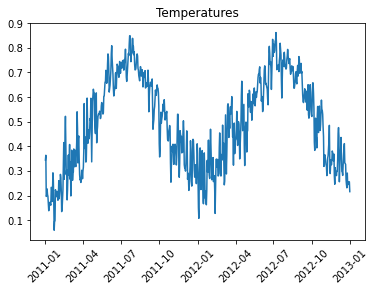

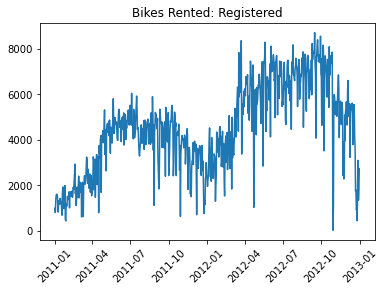

In [4]:
plt.plot(bike_sharing["dteday"], bike_sharing["temp"])
plt.xticks(rotation= 45)
plt.title("Temperatures")
plt.show()

plt.plot(bike_sharing['dteday'], bike_sharing['cnt'])
plt.xticks(rotation=45)
plt.title("Bikes Rented: Registered")
plt.show()

#### Scatter Plots

The similarity in how the air temperature and the number of rented bikes changed over 2011 and 2012 supports this hypothesis.

Above, we plotted `cnt` and `temp` against `dteday`. To visualize the relationship between `cnt` and `temp`, it's better if we plot one against the other, and leave out the `dteday` column. We can do this with a scatter plot (also known as scatter graph or scatter chart).

We will use the function [`plt.scatter()` function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)

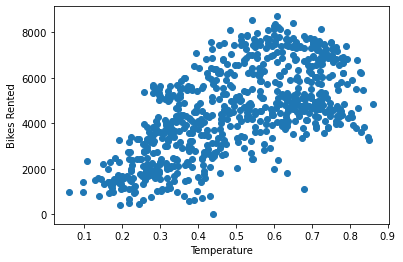

In [5]:
plt.scatter(bike_sharing['temp'], bike_sharing['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Bikes Rented')
plt.show()

Each point (also called a marker) on the scatter plot has an x-coordinate and an y-coordinate. Above, the `temp` column provides the x-coordinates, and the `cnt` column provides the y-coordinates.

Generally, the first column we pass to `plt.scatter(x, y)` provides the x-coordinates, and the second one the y-coordinates.

One thing we notice in the scatter plot above is that the overall direction of the points is upward (seen from left to right). This is because as the temperature increases, the number of bike rentals tends to grow too.

Seen from right to left, the direction of the points is downward — as the temperature decreases, the number of rentals also tends to decrease.

![Image](https://s3.amazonaws.com/dq-content/521/correlation_viz.svg)

Let's now plot `windspeed` against `cnt` on a scatter plot:

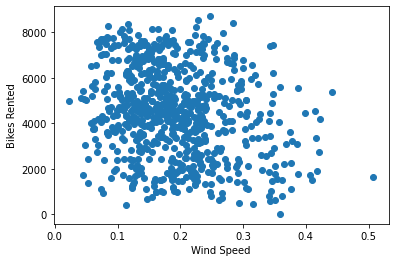

In [6]:
plt.scatter(bike_sharing["windspeed"], bike_sharing["cnt"])
plt.xlabel("Wind Speed")
plt.ylabel("Bikes Rented")
plt.show()

The general direction of the points (seen from left to right) is different on the two plots:

- `temp` versus `cnt` shows an upward trend
- `windspeed` versus `cnt` shows a downward trend (approximately)

Both the `temp` and the `windpseed` columns relate to the `cnt` column, but in a different way.

When the values in `temp` increase, the values in `cnt` tend to go up as well (and vice versa). When the values in `temp` decrease, the values in `cnt` tend to go down as well (and vice versa).

On the other side, when the values in `windspeed` increase, the values in `cnt` don't go up — they tend to decrease instead. When the values in `windspeed` decrease, the values in cnt tend to go up (and vice versa).

In a broad sense, when two columns are statistically related in a specific way and to a certain degree, we call this relationship **correlation**.

There are two kinds of correlation: positive and negative.

Two positively correlated columns tend to change in the same direction — when one increases (or decreases), the other tends to increase (or decrease) as well. On a scatter plot, two positively correlated columns show an upward trend (like in the `temp` versus `cnt` plot).

![Image](https://s3.amazonaws.com/dq-content/521/positive_correlation.svg)

Two negatively correlated columns tend to change in opposite directions — when one increases, the other tends to decrease, and vice versa. On a scatter plot, two negatively correlated columns show a downward trend (like in the `windspeed` versus `cnt` plot).

![Image](https://s3.amazonaws.com/dq-content/521/negative_correlation.svg)

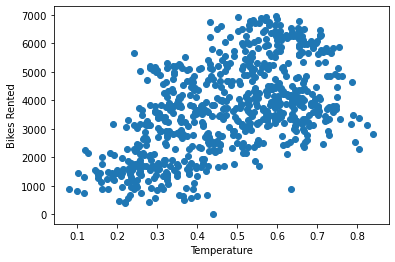

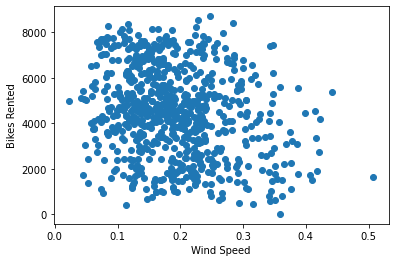

In [7]:
plt.scatter(bike_sharing["atemp"], bike_sharing["registered"])
plt.xlabel("Temperature")
plt.ylabel("Bikes Rented")
plt.show()

plt.scatter(bike_sharing["windspeed"], bike_sharing["cnt"])
plt.xlabel("Wind Speed")
plt.ylabel("Bikes Rented")
plt.show()

#### Pearson Correlation Coefficient (Pearson's r)

We can clearly see a positive correlation between the feeling temperature `atemp` and the `registered` column.
If we look at the two graphs above, it's easier to tell the overall direction of the points for the graph on the left.

That's because the correlation between `temp` and `cnt` is stronger than that between `windspeed` and `cnt`.

To calculate the Pearson's r between any two columns, we can use the [`Series.corr()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html). For instance, this is how we can calculate the two correlations above:

`bike_sharing['temp'].corr(bike_sharing['cnt'])` and `bike_sharing['windspeed'].corr(bike_sharing['cnt'])`

`Series.corr()` uses a math formula that only works with numbers. This means that `Series.corr()` only works with *numerical columns* — if we use string or datetime columns, we'll get an error.

The `Series.corr()` method only allows us to calculate the correlation between two numerical columns. We can get an overview of correlations using the `DataFrame.corr()` method, which calculates the Pearson's r between all pairs of numerical columns.

Most often, we're only interested in finding the correlation for just a few columns. For example, what if we only want to see the correlation for the `cnt`, `casual`, and `registered` columns? The `DataFrame.corr()` method *returns a DataFrame*, which means we can select the `cnt`, `casual`, and `registered` columns directly.

`bike_sharing.corr()[['cnt', 'casual', 'registered']]`


In [8]:
bike_sharing.corr()[['cnt', 'casual', 'registered']]

,cnt,casual,registered
instant,0.628830,0.275255,0.659623
season,0.406100,0.210399,0.411623
yr,0.566710,0.248546,0.594248
mnth,0.279977,0.123006,0.293488
holiday,-0.068348,0.054274,-0.108745
weekday,0.067443,0.059923,0.057367
workingday,0.061156,-0.518044,0.303907
weathersit,-0.297391,-0.247353,-0.260388
temp,0.627494,0.543285,0.540012
atemp,0.631066,0.543864,0.544192


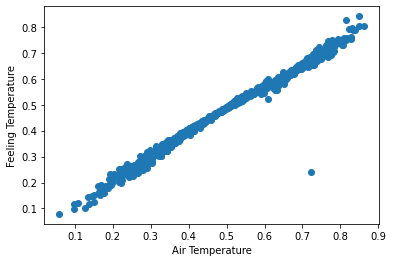

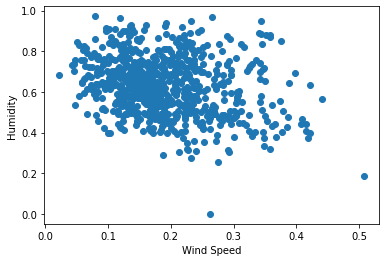

In [9]:
temp_atemp_corr= bike_sharing["temp"].corr(bike_sharing["atemp"])
wind_hum_corr= bike_sharing["windspeed"].corr(bike_sharing["hum"])

plt.scatter(bike_sharing["temp"], bike_sharing["atemp"])
plt.xlabel("Air Temperature")
plt.ylabel("Feeling Temperature")
plt.show()

plt.scatter(bike_sharing["windspeed"], bike_sharing["hum"])
plt.xlabel("Wind Speed")
plt.ylabel("Humidity")
plt.show()


In [10]:
bike_sharing["weathersit"].corr(bike_sharing["hum"])

0.5910445992972728

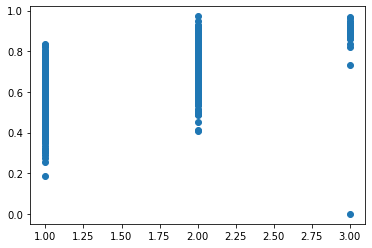

In [11]:
plt.scatter(bike_sharing["weathersit"], bike_sharing["hum"])
plt.show()

When we find a strong correlation between two columns, one common mistake is to assume that the columns must also have a relationship of causality — one is the cause, and the other is the effect.

For instance, let's say we found a strong positive correlation between the number of bike rentals and ice cream sales. When the number of bike rentals goes up, the number of ice cream sales tends to go up as well. When bike rentals decrease, ice cream sales tend to decrease too.

The positive correlation doesn't imply that ice cream sales are causing bike rentals to increase or decrease (or vice versa). Most likely, both ice cream sales and bike rentals are related to temperature variations in a similar way, and this is why they change together similarly.

However, correlation can suggest causality. If two columns are correlated, it might be because of a cause-and-effect relationship. It might. To establish a relationship of causality, we often need to perform a rigorous experiment.

The overarching point is that proving causality requires more than just correlation. We can't say that X is the cause of Y simply because columns X and Y are strongly correlated. In other words, correlation does not imply causation.

# Bar Plots, Histograms, and Distributions

In [12]:
bike_sharing['workingday'].value_counts()

1    500
0    231
Name: workingday, dtype: int64

In [13]:
bike_sharing.corr()['workingday'][['casual', 'registered']]

casual       -0.518044
registered    0.303907
Name: workingday, dtype: float64

`workingday` has a negative correlation with `casual` column but a positive correlation with `registered`.

These vaues suggest that registered users tend to use the bikes more on working days, possibly for commuting to work/ school.

Also, casual users tent to rent the bikes in the weekends and on holidays which may indicate that they use the bikes for leisure time.

Let's visualize the correlations

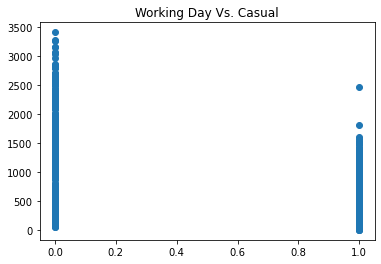

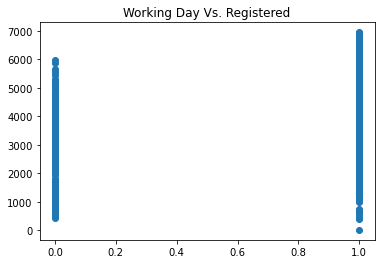

In [14]:
plt.scatter(bike_sharing['workingday'], bike_sharing['casual'])
plt.title("Working Day Vs. Casual")
plt.show()

plt.scatter(bike_sharing['workingday'], bike_sharing['registered'])
plt.title("Working Day Vs. Registered")
plt.show()

In [15]:
print(bike_sharing[bike_sharing['workingday']== 0][['casual', 'registered']].mean())

#another alternative could have been `bike_sharing.loc[bike_sharing["workingday"] ==  0, "casual"].mean()`, 
#but it would have calculated only the firs number

casual        1371.134199
registered    2959.034632
dtype: float64


In [16]:
print(bike_sharing[bike_sharing['workingday']== 1][['casual', 'registered']].mean())

casual         606.57
registered    3978.25
dtype: float64


On non-working days, casual users rent on average more than double the number of bikes they rent on working days: 1,371 bikes compared to 607 bikes.

Conversely, registered users rent significantly less during non-working days: 2,959 compared to 3,978 bikes.

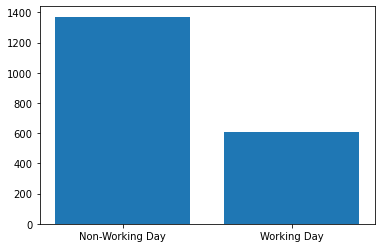

In [17]:
working_days = ['Non-Working Day', 'Working Day']
casual_avg = [1371, 607]

plt.bar(working_days, casual_avg)
plt.show()

In [18]:
bike_sharing.loc[bike_sharing["workingday"] ==  0, "casual"].mean() 

1371.1341991341992

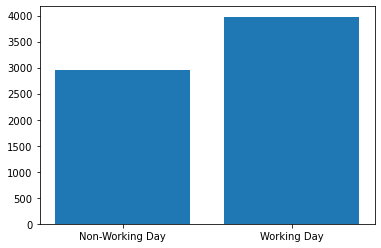

In [19]:
working_days = ['Non-Working Day', 'Working Day']
registered_avg = [2959, 3978]

plt.bar(working_days, registered_avg)
plt.show()

I showed that the data indicates that registered users tend to use the bikes more on working days, while casual users tend to rent the bikes more on weekends and holidays.

I will take a more granular approach to analyzing the data and examine the average number of rentals for casual and registered users based on the day of the week (Monday, Tuesday, Wednesday, etc.).

The `weekday` column in our dataset describes the day of the week (`0` is Sunday, and `6 is Saturday)

In [20]:
#displaying the weekday column
#using df.sort_index() to sort it ascending
bike_sharing['weekday'].value_counts().sort_index()

0    105
1    105
2    104
3    104
4    104
5    104
6    105
Name: weekday, dtype: int64

In [21]:
weekdays_np= bike_sharing['weekday'].unique()
weekdays_sorted= np.sort(weekdays_np)

In [22]:
#important to use Series.unique() in order to loop over the variables a single time
main_list=[]

for w in weekdays_sorted:
    #print(w)
    a_dict= {}
    a_dict["weekday"]= w
    a_dict["casual"]= bike_sharing.loc[bike_sharing['weekday']== w, "casual"].mean()
    #print(a_dict)
    main_list.append(a_dict)
    a_dict["registered"]= bike_sharing.loc[bike_sharing['weekday']== w, "registered"].mean()

weekdays_averages= pd.DataFrame(main_list)
weekdays_averages



,weekday,casual,registered
0,0,1338.295238,2890.533333
1,1,674.133333,3663.990476
2,2,556.182692,3954.480769
3,3,551.144231,3997.394231
4,4,590.961538,4076.298077
5,5,752.288462,3938.000000
6,6,1465.257143,3085.285714


**SHORTER VERSION OF THE ABOVE CODE**:
` bike_sharing.groupby('weekday').mean()[['casual', 'registered']].reset_index() `

Notice that now we have seven rows in the table, and it's a bit harder to compare all the values. I will use a bar plot in order to get a visual estimate of the differences instead of going over values one-by-one and performing mental subtractions.

Below, we generate a bar plot for the casual column in our table above.

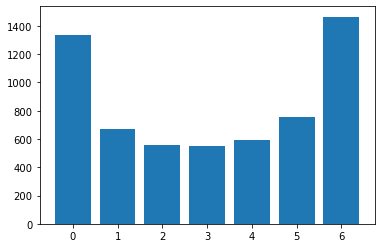

In [23]:
plt.bar(weekdays_averages["weekday"], weekdays_averages["casual"])
plt.show()

The first bar (Sunday) and the last one (Saturday) are more than twice as tall as all the other bars. This shows that casual users rent more bikes on the weekends, which corroborates our initial findings.

Let's change the numbers in the bar chart into the week days names. I will use the [`plt.xticks()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html) function. The `ticks` parameter of the function takes in the x-coordinates, and the `labels`parameter takes in the new labels. Both parameters can take in lists.

**NOTE**: The labels must be written in the same order as the ticks you want to replace
*Tip*: Add rotation in case the label names are too long

Let's generate a bar plot for the `casual` column

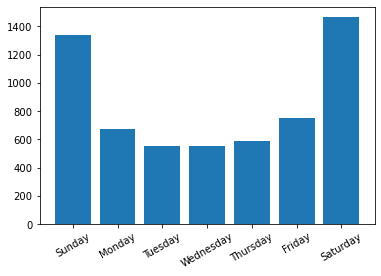

In [24]:
plt.bar(weekdays_averages["weekday"], weekdays_averages["casual"])
plt.xticks(ticks= [0, 1, 2, 3, 4, 5, 6],
          labels= ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
          rotation= 30)
plt.show()

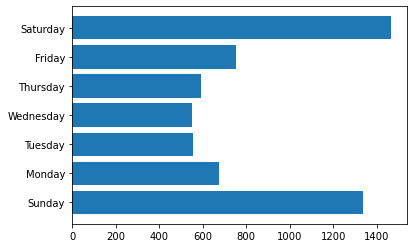

In [25]:
plt.barh(weekdays_averages["weekday"], weekdays_averages["casual"])
plt.yticks(ticks= [0, 1, 2, 3, 4, 5, 6],
          labels= ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
         )
plt.show()

Now let's look at the `registered` column also:

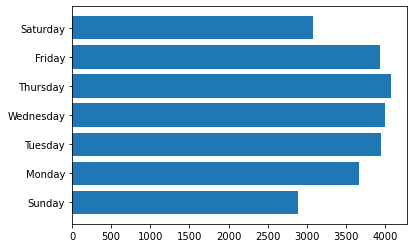

In [26]:
plt.barh(weekdays_averages["weekday"], weekdays_averages["registered"])
plt.yticks(ticks= [0, 1, 2, 3, 4, 5, 6],
          labels= ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
         )
plt.show()

By comparing the two plots of `casual` and `registered` columns, we can confirm the idea that registered users rent more bikes during the working days, possibly for commuting. 

In [27]:
#generating a frequency table -> this will list all the unique value along with the number of times each value occurs
bike_sharing["weathersit"].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

We only see three unique values above, but, according to the documentation, the `weathersit` column has four unique values (`4` has a frequency of zero as a consequence):

- `1`: clear or few clouds
- `2`: mist or cloudy
- `3`: light rain, light snow, thunderstorm
- `4`: heavy rain, snow, ice pellets, fog

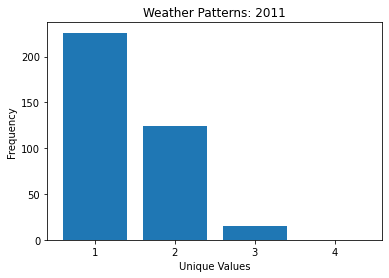

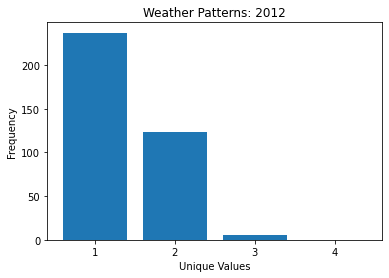

In [28]:
unique_values = [1, 2, 3, 4]
weather_2011 = [226, 124, 15, 0]
weather_2012 = [237, 123, 6, 0]

plt.bar(unique_values, weather_2011)
plt.xticks(ticks=[1,2,3,4])
plt.title('Weather Patterns: 2011')
plt.ylabel('Frequency')
plt.xlabel('Unique Values')
plt.show()


plt.bar(unique_values, weather_2012)
plt.xticks(ticks = [1, 2, 3, 4])
plt.title("Weather Patterns: 2012")
plt.ylabel("Frequency")
plt.xlabel("Unique Values")
plt.show()

We can see that the weather for the year 2011 and year 2012 shows constant values. In 2012 we can see almost 50% less values for light rain, light snow and/or thunderstorms. This made 2012 a slightly better year in terms of weather and therefore a slightly better year for renting a bike

In order to analyze the frequency of bike rentals and find any pattern we can look at the `cnt` column, but this will yield unconclusive results, because each of the 696 entries is unique

In [29]:
bike_sharing['cnt'].value_counts()

5119    2
5698    2
6536    2
5202    2
1977    2
       ..
4456    1
4458    1
4460    1
8173    1
5905    1
Name: cnt, Length: 696, dtype: int64

In order to tackle this issue, it is better if we group them using the `bins=10` argument for the `Series.value_counts()` method. What this does, is to divide the numnbers into 10 bins in order to see better the idea that is conveyed.

As a side note, the number of intervals in a grouped frequency table can vary — we can have 5, 6, 7, 10, 15, etc. Generally, 10 intervals is a good choice because it offers a good balance between information and comprehension.

In [31]:
bike_sharing['cnt'].value_counts(bins=10).sort_index()

(13.307, 891.2]      13
(891.2, 1760.4]      62
(1760.4, 2629.6]     71
(2629.6, 3498.8]     73
(3498.8, 4368.0]    122
(4368.0, 5237.2]    137
(5237.2, 6106.4]     81
(6106.4, 6975.6]     76
(6975.6, 7844.8]     79
(7844.8, 8714.0]     17
Name: cnt, dtype: int64

The unique values are now number intervals. `(4368.0, 5237.2]` is a number interval. The `(` character indicates that the starting number is not included, while the `]` indicates that the ending number is included. The interval `(4368.0, 5237.2]` contains all numbers greater than 4368.0 and less than or equal to 5237.2.

If we look at the table we can make the following observartions:
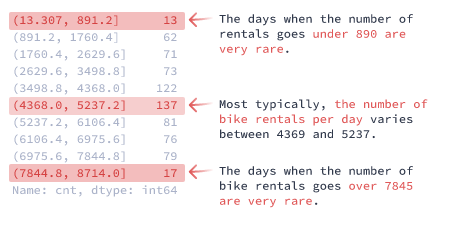

Let's now generate a grouped frequency table for `registered` and `casual` columns

In [32]:
registered_freq = bike_sharing['registered'].value_counts(bins = 10).sort_index()
casual_freq = bike_sharing['casual'].value_counts(bins = 10).sort_index()

The best way to vizualize a grouped frequency table is to use a **histogram** by using `plt.hist()`. It will only need to pass in the `cnt` column and the function will automatically group the data into bins (default is 10) and plots a bar for *each interval*

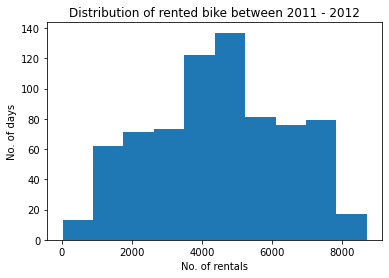

In [42]:
plt.hist(bike_sharing['cnt'])
plt.title("Distribution of rented bike between 2011 - 2012")
plt.xlabel("No. of rentals")
plt.ylabel("No. of days")
plt.show()

Let's now try to see how the `casual` histogram looks like

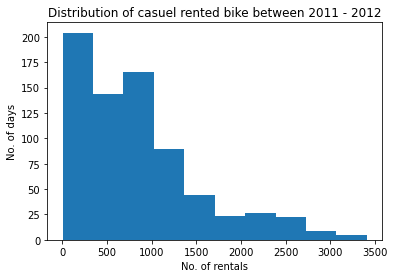

In [43]:
plt.hist(bike_sharing['casual'])
plt.title("Distribution of casuel rented bike between 2011 - 2012")
plt.xlabel("No. of rentals")
plt.ylabel("No. of days")
plt.show()

The main difference to be noted here is between the frequencies of the two histograms.  The `cnt` histogram looks likle a **normal dsitribution** histrogram: most of the values lie in the middle and their frequency decreases as we move towards the minimum and maximum of the range.

The `casual` histogram has a **right skewed distribution**, most of the values piling up in the start of the range with the values decreasing towards the end of the range.